In [5]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(img):
  min_ = np.min(img)
  if min_ < 0:
    img += -min_
  else:
    img -= min_
  max_ = np.max(img)
  img /= max_
  
  for k in range(img.shape[0]):
    for d in range(img.shape[1]):
      assert 0 <= img[k, d] <= 1
  return img

In [32]:
unfair_path = "../../final_project/adversarial_debiasing/weights_0.npz"
fair_path_0_5 = "../../final_project/adversarial_debiasing/weights_0_5.npz"
fair_path_1_0 = "../../final_project/adversarial_debiasing/weights_1_0.npz"
fair_path_1_5 = "../../final_project/adversarial_debiasing/weights_1_5.npz"

In [89]:
curr_path = fair_path_1_5
save=False
weights_trained = normalize(np.load(curr_path)['data'])

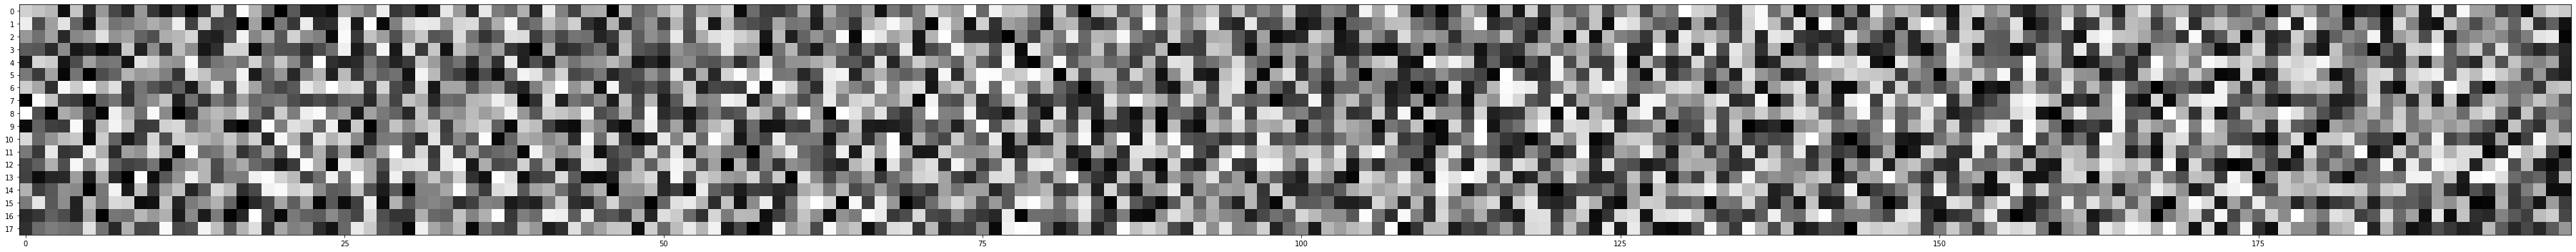

In [90]:
plt.figure(figsize=(80, 5))
plt.imshow(weights_trained, cmap='gray')
ax = plt.gca()
ax.set_yticks(np.arange(0, 18, 1))
plt.tight_layout()
if save:
  plt.savefig(f'weights_viz_{curr_path[-5:-4]}')


(18, 200)
(18,)
(18, 10)


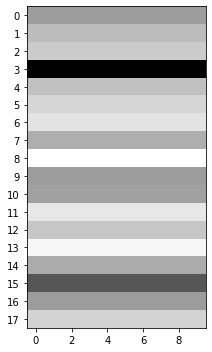

In [91]:
print(weights_trained.shape)
weights_trained_summed = weights_trained.sum(axis=1)
print(weights_trained_summed.shape)
weights_trained_summed = weights_trained_summed.reshape((18, 1))
weights_trained_summed_viz = np.tile(weights_trained_summed, (1, 10))
print(weights_trained_summed_viz.shape)
plt.figure(figsize=(10, 5))
plt.imshow(weights_trained_summed_viz, cmap='gray')
ax = plt.gca()
ax.set_yticks(np.arange(0, 18, 1))
plt.tight_layout()
if save:
  plt.savefig(f'weights_viz_summed_{curr_path[-7:-4]}')

In [92]:
# Compare summed weights of gender vs. occupation
weights_trained_arr = weights_trained_summed.squeeze(-1)
print(weights_trained_arr.shape)

sex_weight = weights_trained_arr[1]

occ_weights = weights_trained_arr[9:]

sex_count = 0
for w in occ_weights:
  if w <= sex_weight:
    sex_count += 1
    
print(sex_count / len(occ_weights))

(18,)
0.5555555555555556
